In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.spatial import distance
import scipy.stats as stats

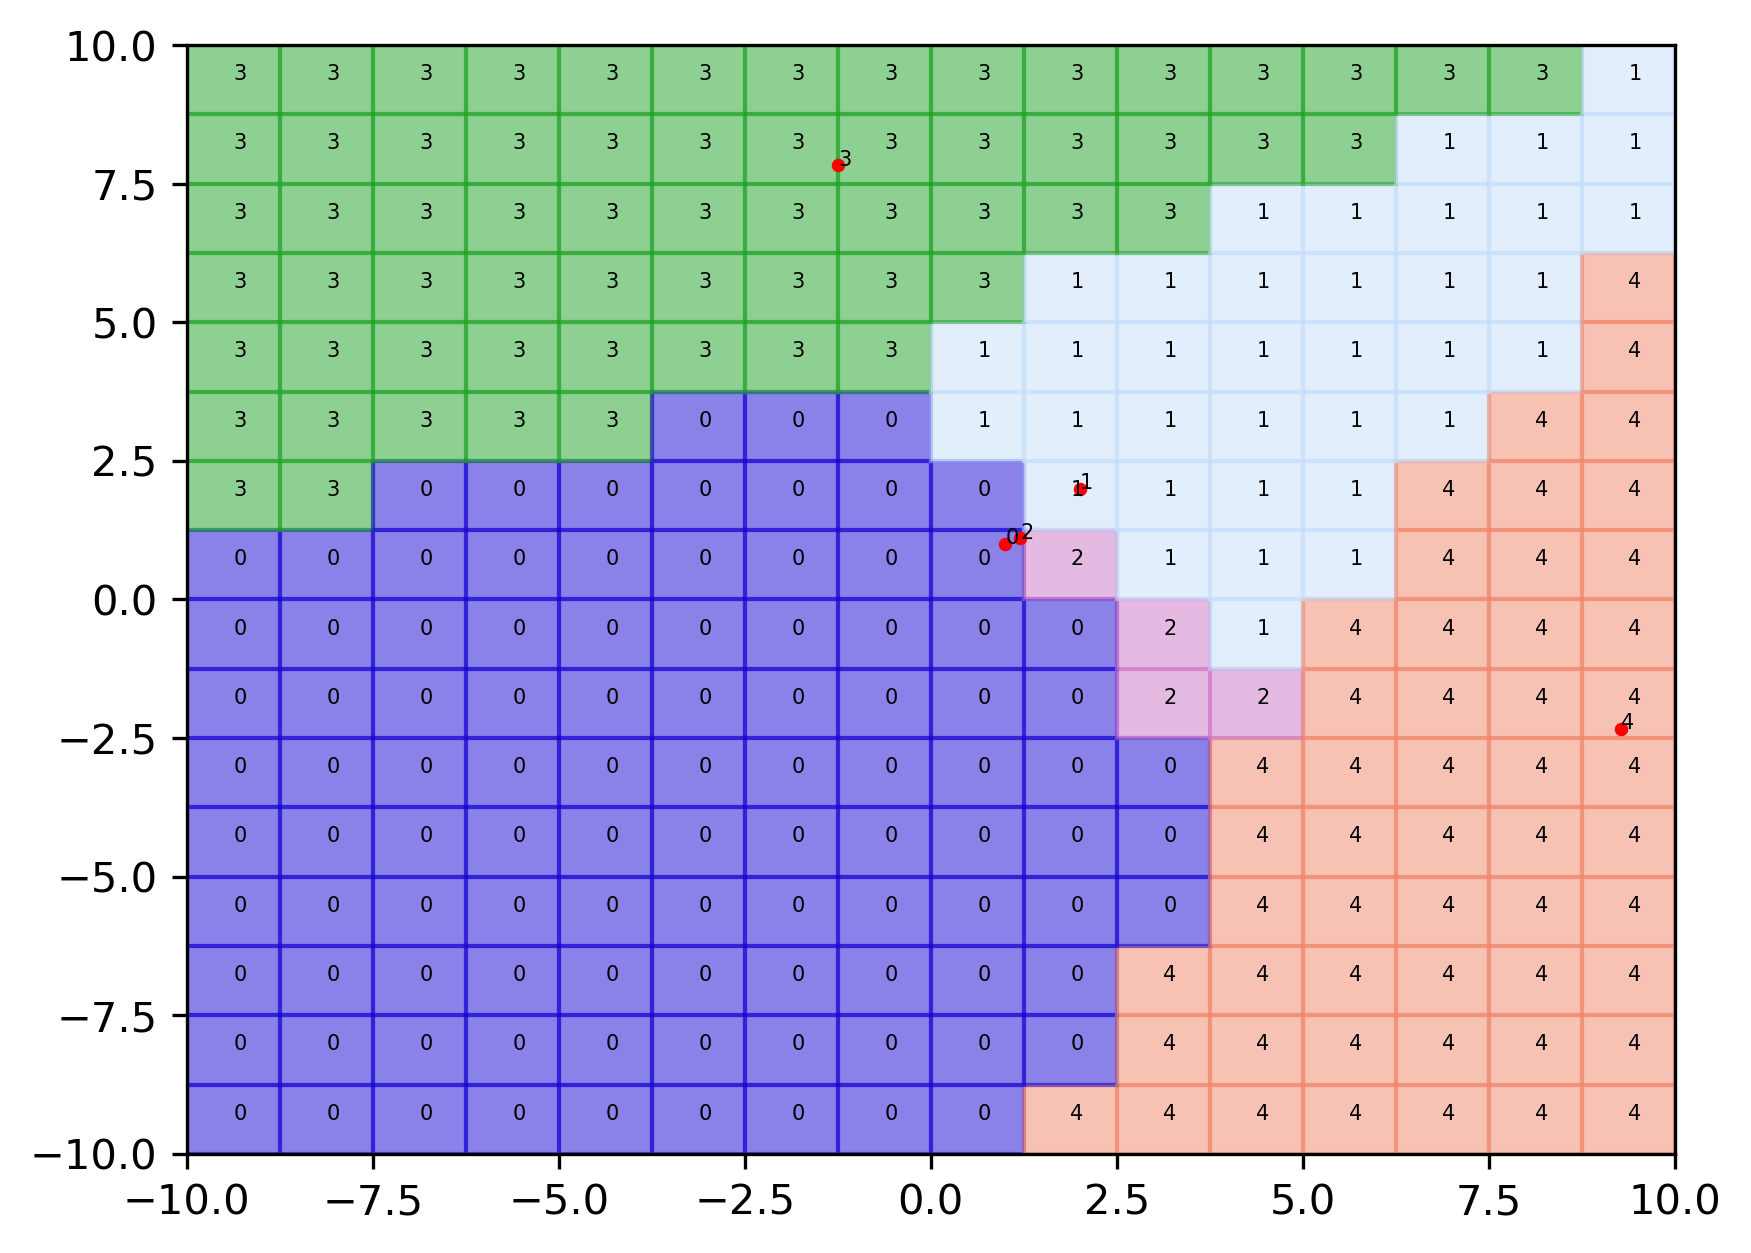

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import matplotlib.cm as cm

# Step 1: Generate a set of 2D points
np.random.seed(0)  # For reproducibility
num_points = 5# You can adjust the number of points as needed
cube_length = 20
voxel_resolution = 2**4
points = np.random.uniform(-10, 10, size=(num_points, 2))
masses = np.random.uniform(1, 10, size=(1,num_points))

points[0] = np.array([1,1])
points[1] = np.array([2,2])
points[2] = np.array([1.2,1.1])
# points = np.array([[2,8],[-2,-8],[0,0]])


bins = np.linspace(-cube_length/2,cube_length/2,voxel_resolution+1)
bin_centers = (bins[1:] + bins[:-1])/2
voxel_centers = np.array([bin_centers, bin_centers]) # kpc


xx = np.meshgrid(bins, bins)[0]
yy = np.meshgrid(bins, bins)[1]

xx_c = np.meshgrid(bin_centers,bin_centers)[0]
yy_c = np.meshgrid(bin_centers,bin_centers)[1]

# voxel_centers 

grid_c = np.dstack(np.array([xx_c,yy_c])).reshape(-1,2)
grid_ids = np.argmin(distance.cdist(grid_c, points), axis=1)


l = len(bins)
grid_points_1 = np.vstack((xx[0:l-1,1:  l].ravel(), yy[0:l-1,1:  l].ravel())).T
grid_points_2 = np.vstack((xx[0:l-1,0:l-1].ravel(), yy[0:l-1,0:l-1].ravel())).T
grid_points_3 = np.vstack((xx[1:  l,0:l-1].ravel(), yy[1:  l,0:l-1].ravel())).T
grid_points_4 = np.vstack((xx[1:  l,1:  l].ravel(), yy[1:  l,1:  l].ravel())).T

voxel_vertices = np.array([grid_points_1 ,grid_points_2,grid_points_3,grid_points_4])
voxel_vertices = np.swapaxes(voxel_vertices, 0, 1)

colors = np.random.rand(voxel_resolution**2,3)
# colors = cm.viridis(np.linspace(0, 1,num_points)) #num_points

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

for i in range(len(voxel_vertices)):
#     ax.fill(voxel_vertices[i][:,0], voxel_vertices[i][:,1], edgecolor='none', fill=True, alpha=0.5, c=colors[i])
    ax.fill(voxel_vertices[i][:,0], voxel_vertices[i][:,1], edgecolor='none', fill=True, alpha=0.5, 
            c=colors[grid_ids[i]])

ax.scatter(points[:,0], points[:,1], c="red", s=5)
# ax.scatter(voxel_centers[1], voxel_centers[0], c="black", s=5)
# ax.scatter(xx_c, yy_c, s=2, c="black")

for i in range(0,len(points)):
    plt.text(points[i][0], points[i][1], str(i), fontsize=5, color="black")


for i in range(0,len(grid_c)):
    plt.text(grid_c[i][0], grid_c[i][1], str(grid_ids[i]), fontsize=5, color="black")

plt.show()

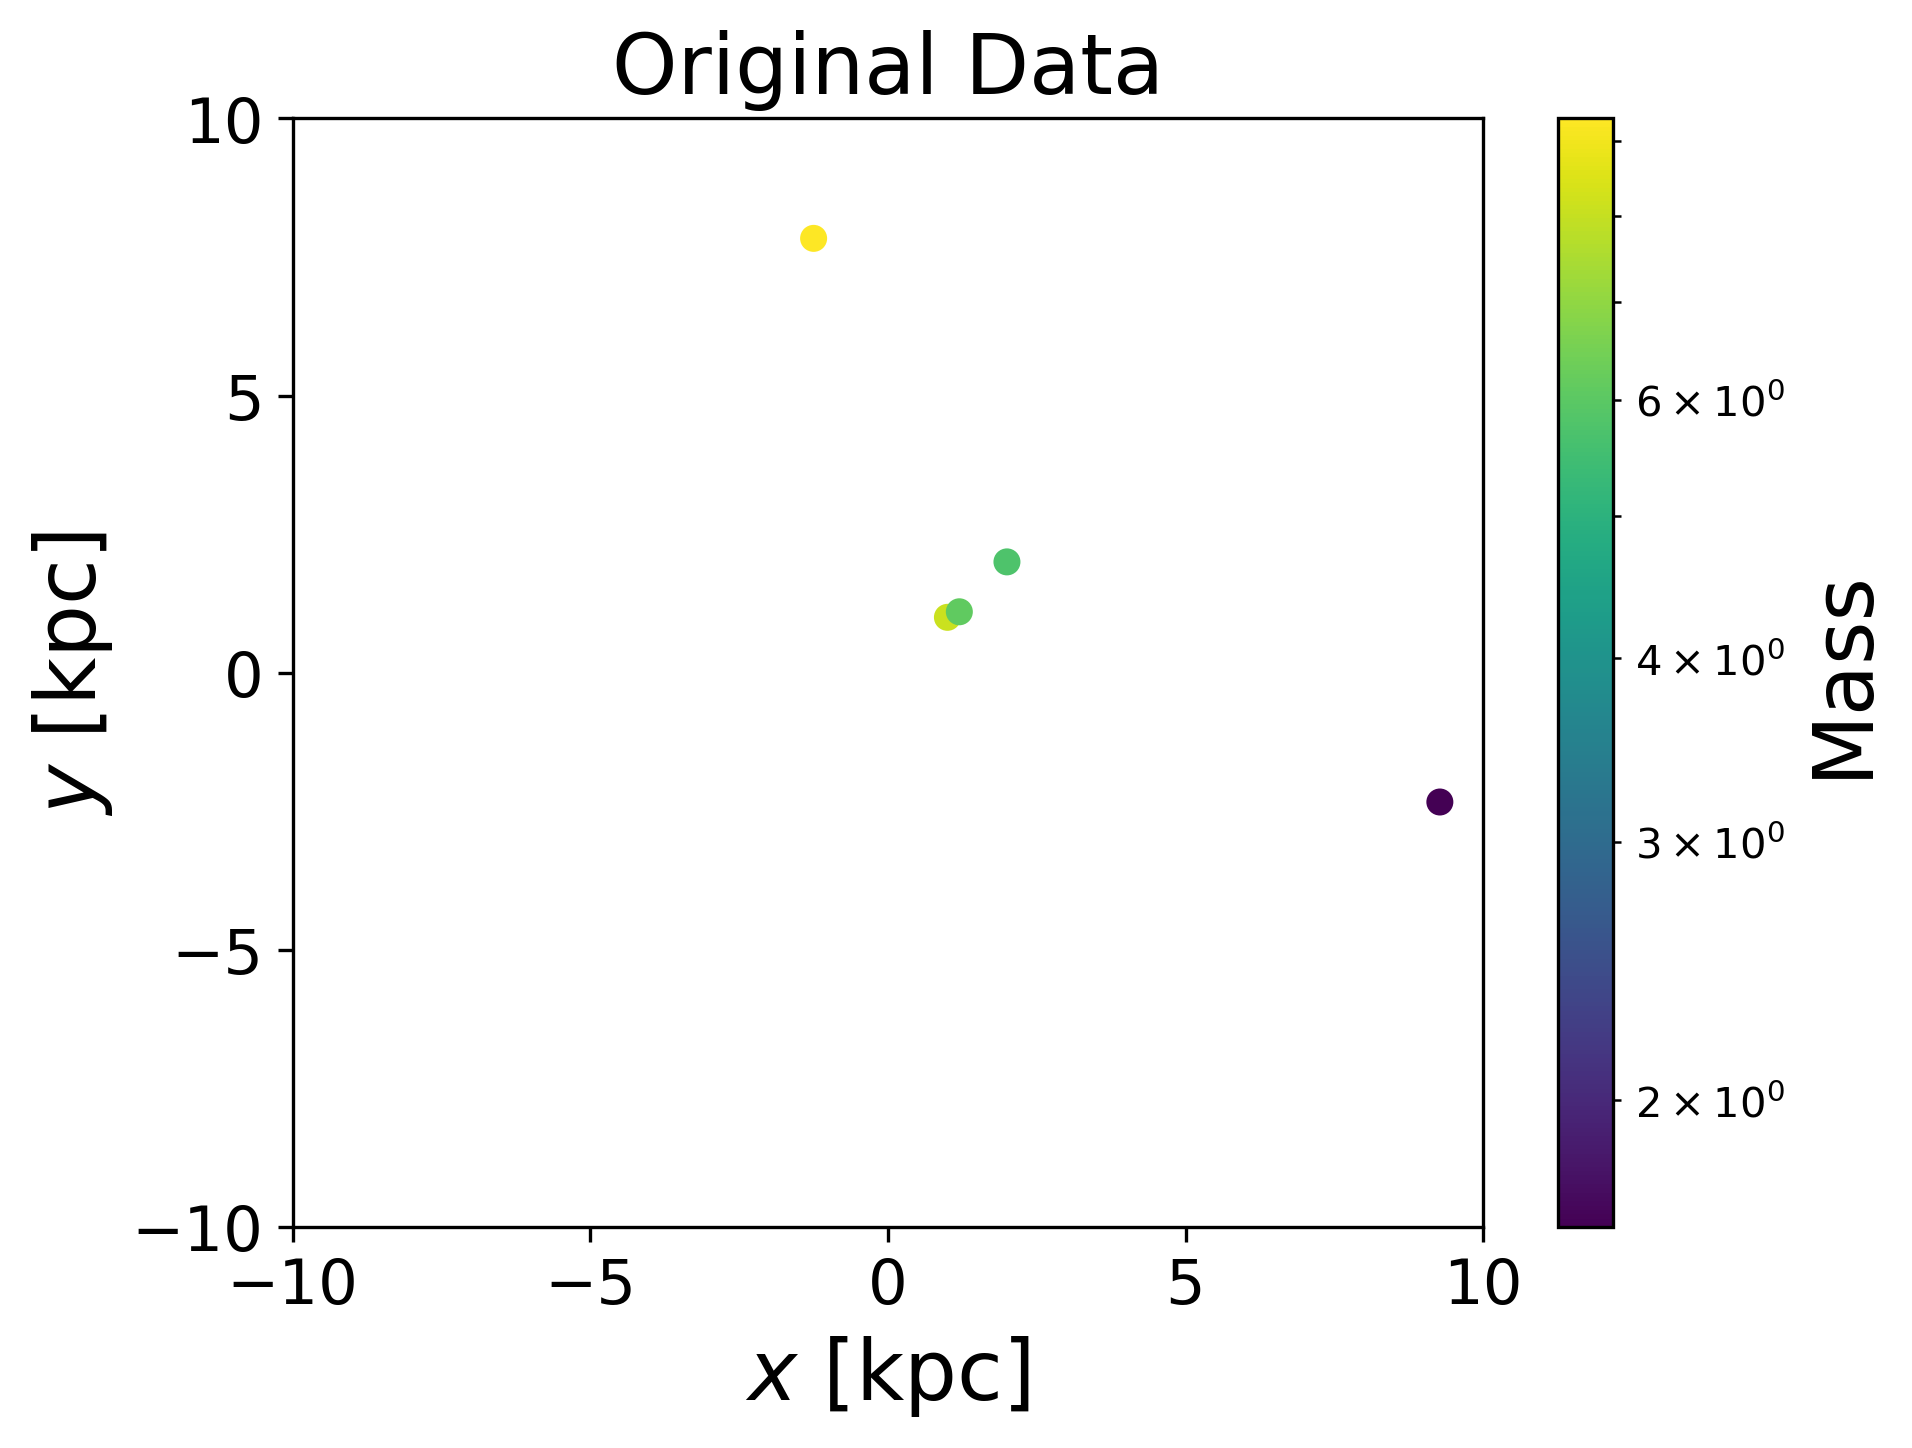

In [3]:
# Plot the points colored by masses
plt.figure(dpi=300)

# Use scatter to plot points with colors based on masses
sc = plt.scatter(points[:, 0], points[:, 1], c=masses, cmap='viridis', s=30, norm=matplotlib.colors.LogNorm())

# Add colorbar
cbar = plt.colorbar(sc)
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Mass", fontsize=20)

plt.xlabel('$x$ [kpc]', size=20)
plt.ylabel('$y$ [kpc]', size=20)
plt.xticks(np.array([-10, -5, 0, 5, 10]), fontsize=15)
plt.yticks(np.array([-10, -5, 0, 5, 10]), fontsize=15)

plt.title("Original Data", size=20)

plt.savefig("../visuals/tesseltation-demo-original"+".png", bbox_inches='tight')
plt.savefig("../visuals/tesseltation-demo-original"+".svg", bbox_inches='tight')

plt.show()

In [4]:
binned_points, bin_edges, bin_numbers = stats.binned_statistic_dd(points, 
                      masses, 
                      statistic='sum', 
                      bins=(bins,bins),
                      expand_binnumbers=True, 
                      binned_statistic_result=None)

binned_points = binned_points[0]

select_binned_points = np.reshape(binned_points,(256,))!=0

In [5]:
binned_points

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0

In [6]:
# # Define the custom mode function
# def binned_mode(values):
#     mode_result, _ = stats.mode(values, axis=None)
#     return mode_result#[0]# if len(mode_result) > 0 else np.nan

# # Perform the binning using the custom mode function
# binned_points, bin_edges, bin_numbers = stats.binned_statistic_dd(
#     points, 
#     masses, 
#     statistic=binned_mode, 
#     bins=(bins, bins),
#     expand_binnumbers=True, 
#     binned_statistic_result=None
# )

# binned_points = binned_points[0]
# binned_points[np.isnan(binned_points)] = 0
# binned_points
# # print(binned_points)


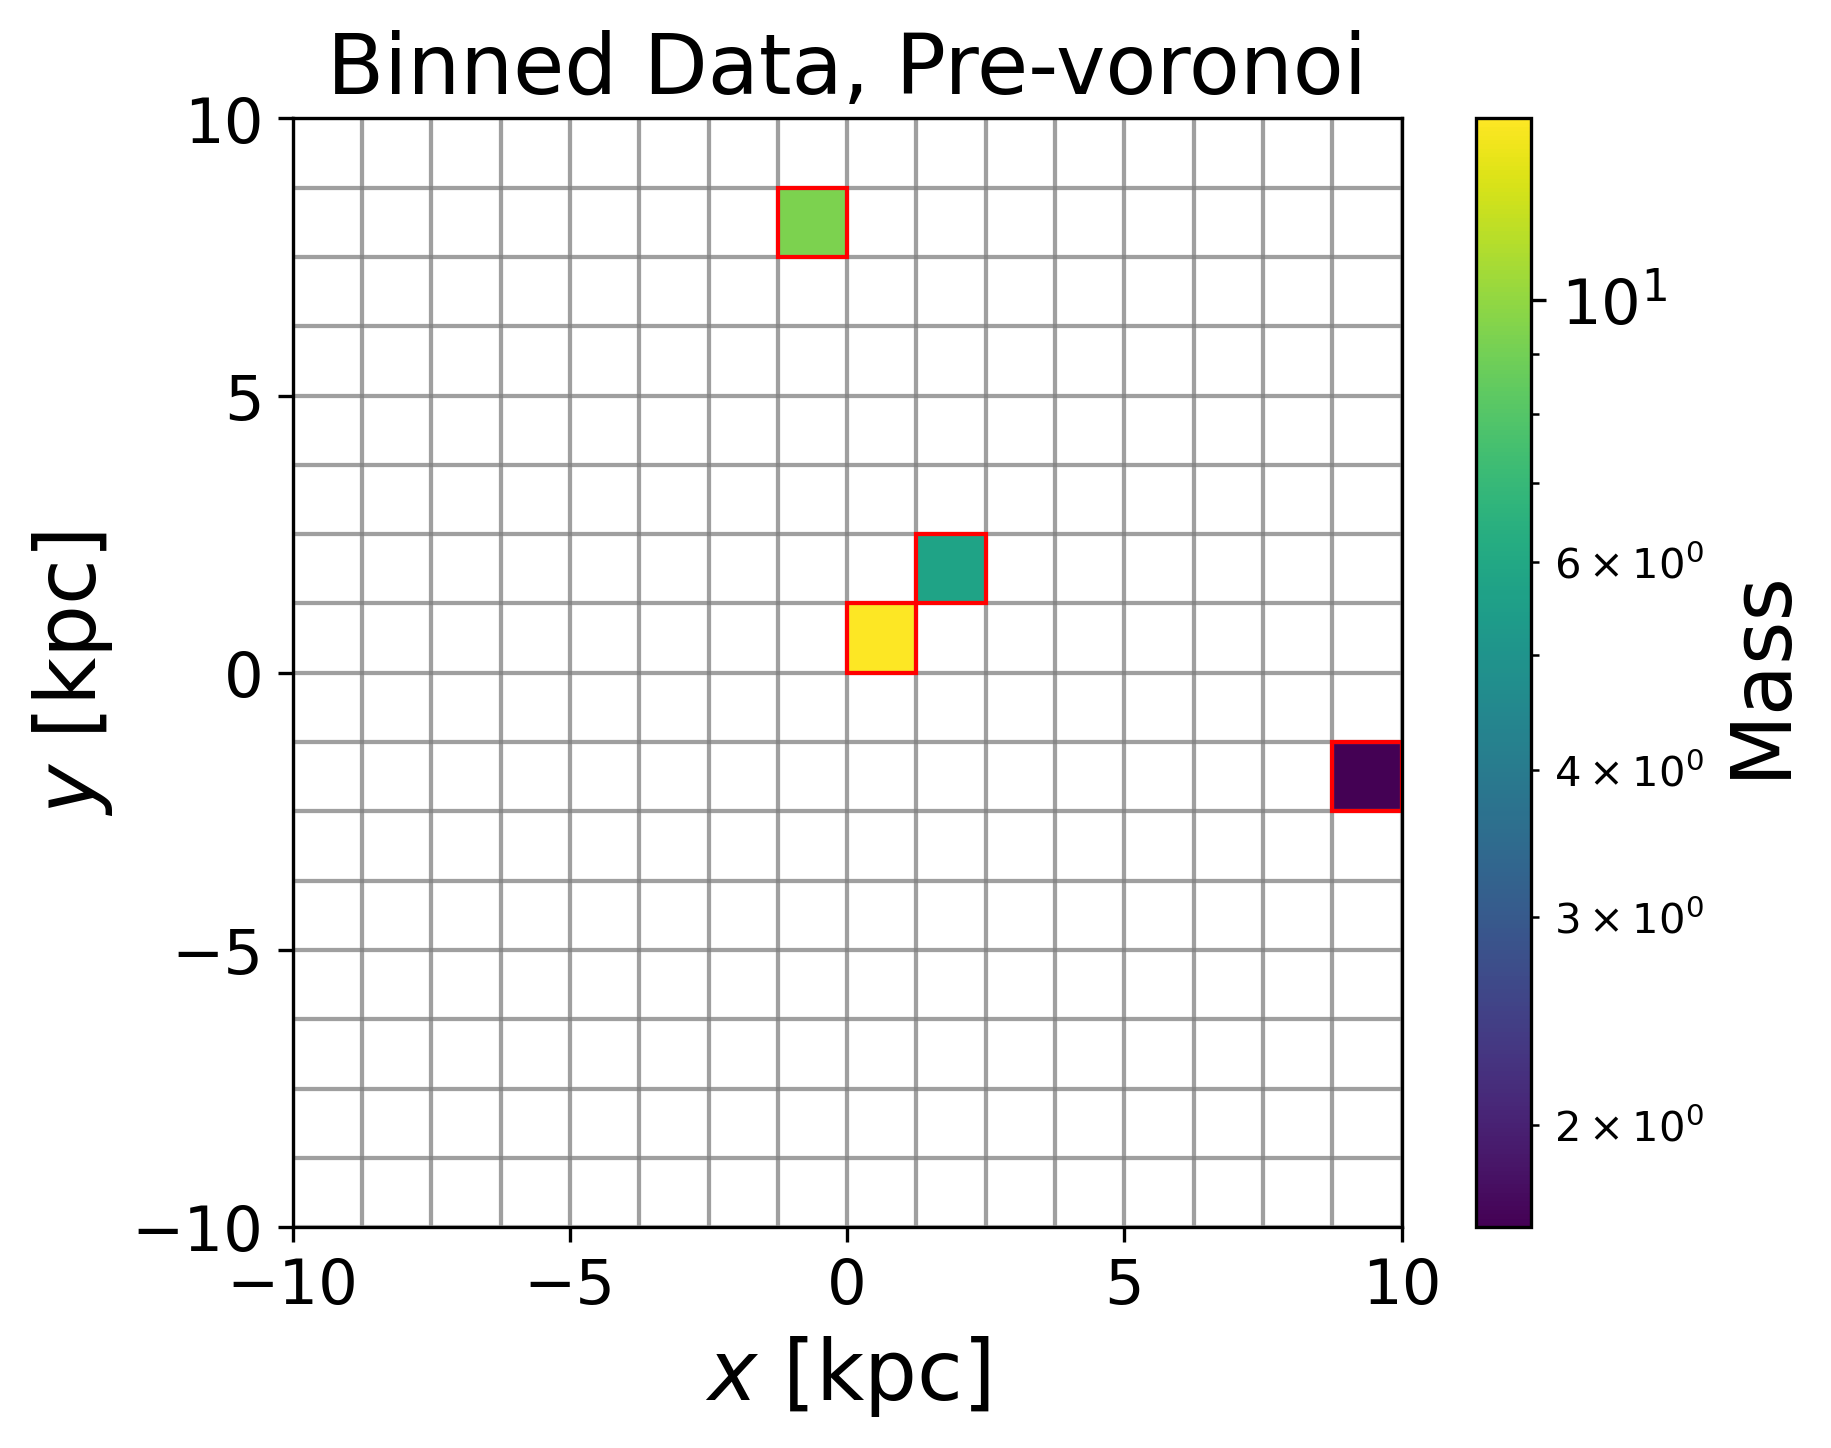

In [7]:
plt.figure(dpi=300)
plt.imshow(binned_points.T, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm(), origin="lower")

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Mass", fontsize=20)
plt.xlabel('$x$ [kpc]', size=20)
plt.ylabel('$y$ [kpc]', size=20)
plt.xticks(np.array([-10,-5,0,5,10]),fontsize=15)
plt.yticks(np.array([-10,-5,0,5,10]), fontsize=15)


for i in range(len(voxel_vertices)):
#     ax.fill(voxel_vertices[i][:,0], voxel_vertices[i][:,1], edgecolor='none', fill=True, alpha=0.5, c=colors[i])
    plt.fill(voxel_vertices[i][:,0], voxel_vertices[i][:,1], edgecolor='black', fill=False, alpha=0.5, 
            c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    plt.fill(voxel_vertices[select_binned_points][i][:,1], voxel_vertices[select_binned_points][i][:,0], edgecolor='black', fill=False, alpha=1, 
        c="red")

plt.title("Binned Data, Pre-voronoi", size=20)

plt.savefig("../visuals/tesseltation-demo-pre"+".png", bbox_inches='tight')
plt.savefig("../visuals/tesseltation-demo-pre"+".svg", bbox_inches='tight')

plt.show()

In [8]:
non_empty_points = binned_points!=0

grid_ids = np.argmin(distance.cdist(grid_c, np.array([xx_c[non_empty_points], yy_c[non_empty_points]]).transpose()), axis=1)

non_empty_points_reshaped = np.reshape(non_empty_points, voxel_resolution**2)
quantity = np.reshape(binned_points, voxel_resolution**2)

voronoied_result = quantity[non_empty_points_reshaped][grid_ids] / np.bincount(grid_ids)[grid_ids]
voronoied_result = voronoied_result.reshape((voxel_resolution, voxel_resolution))

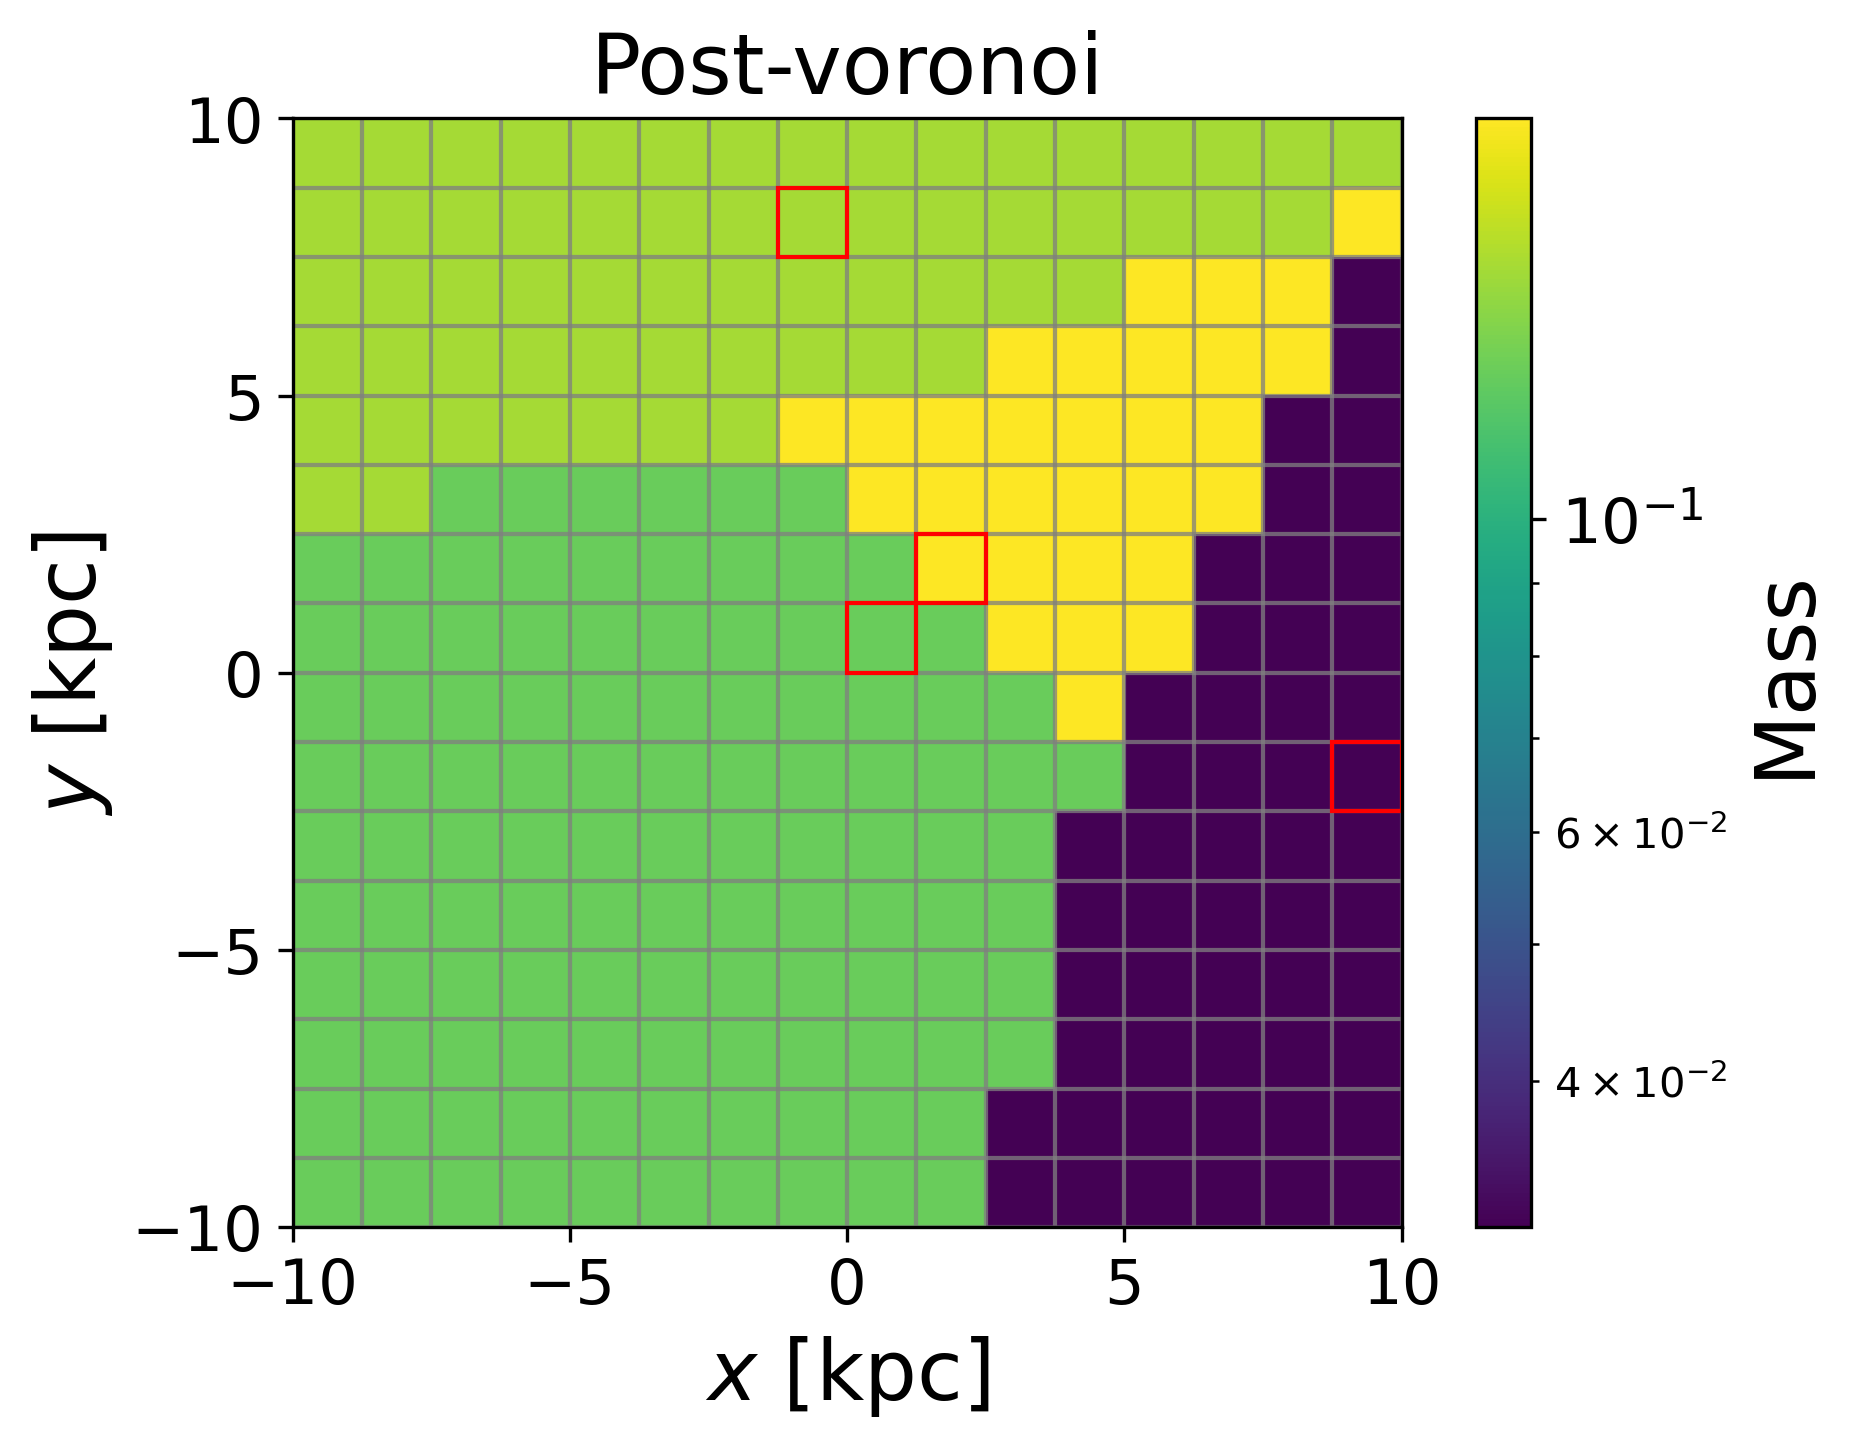

In [9]:
plt.figure(dpi=300)
plt.imshow(voronoied_result.T, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm(), origin="lower")
# plt.imshow(binned_points.T, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm(), origin="lower")

for i in range(len(voxel_vertices)):
#     ax.fill(voxel_vertices[i][:,0], voxel_vertices[i][:,1], edgecolor='none', fill=True, alpha=0.5, c=colors[i])
    plt.fill(voxel_vertices[i][:,0], voxel_vertices[i][:,1], edgecolor='black', fill=False, alpha=0.5, 
            c="gray")


for i in range(len(voxel_vertices[select_binned_points])):
    plt.fill(voxel_vertices[select_binned_points][i][:,1], voxel_vertices[select_binned_points][i][:,0], edgecolor='black', fill=False, alpha=1, 
        c="red")

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Mass", fontsize=20)
plt.xlabel('$x$ [kpc]', size=20)
plt.ylabel('$y$ [kpc]', size=20)
plt.xticks(np.array([-10,-5,0,5,10]),fontsize=15)
plt.yticks(np.array([-10,-5,0,5,10]), fontsize=15)

plt.title("Post-voronoi", size=20)

plt.savefig("../visuals/tesseltation-demo-post"+".png", bbox_inches='tight')
plt.savefig("../visuals/tesseltation-demo-post"+".svg", bbox_inches='tight')

plt.show()

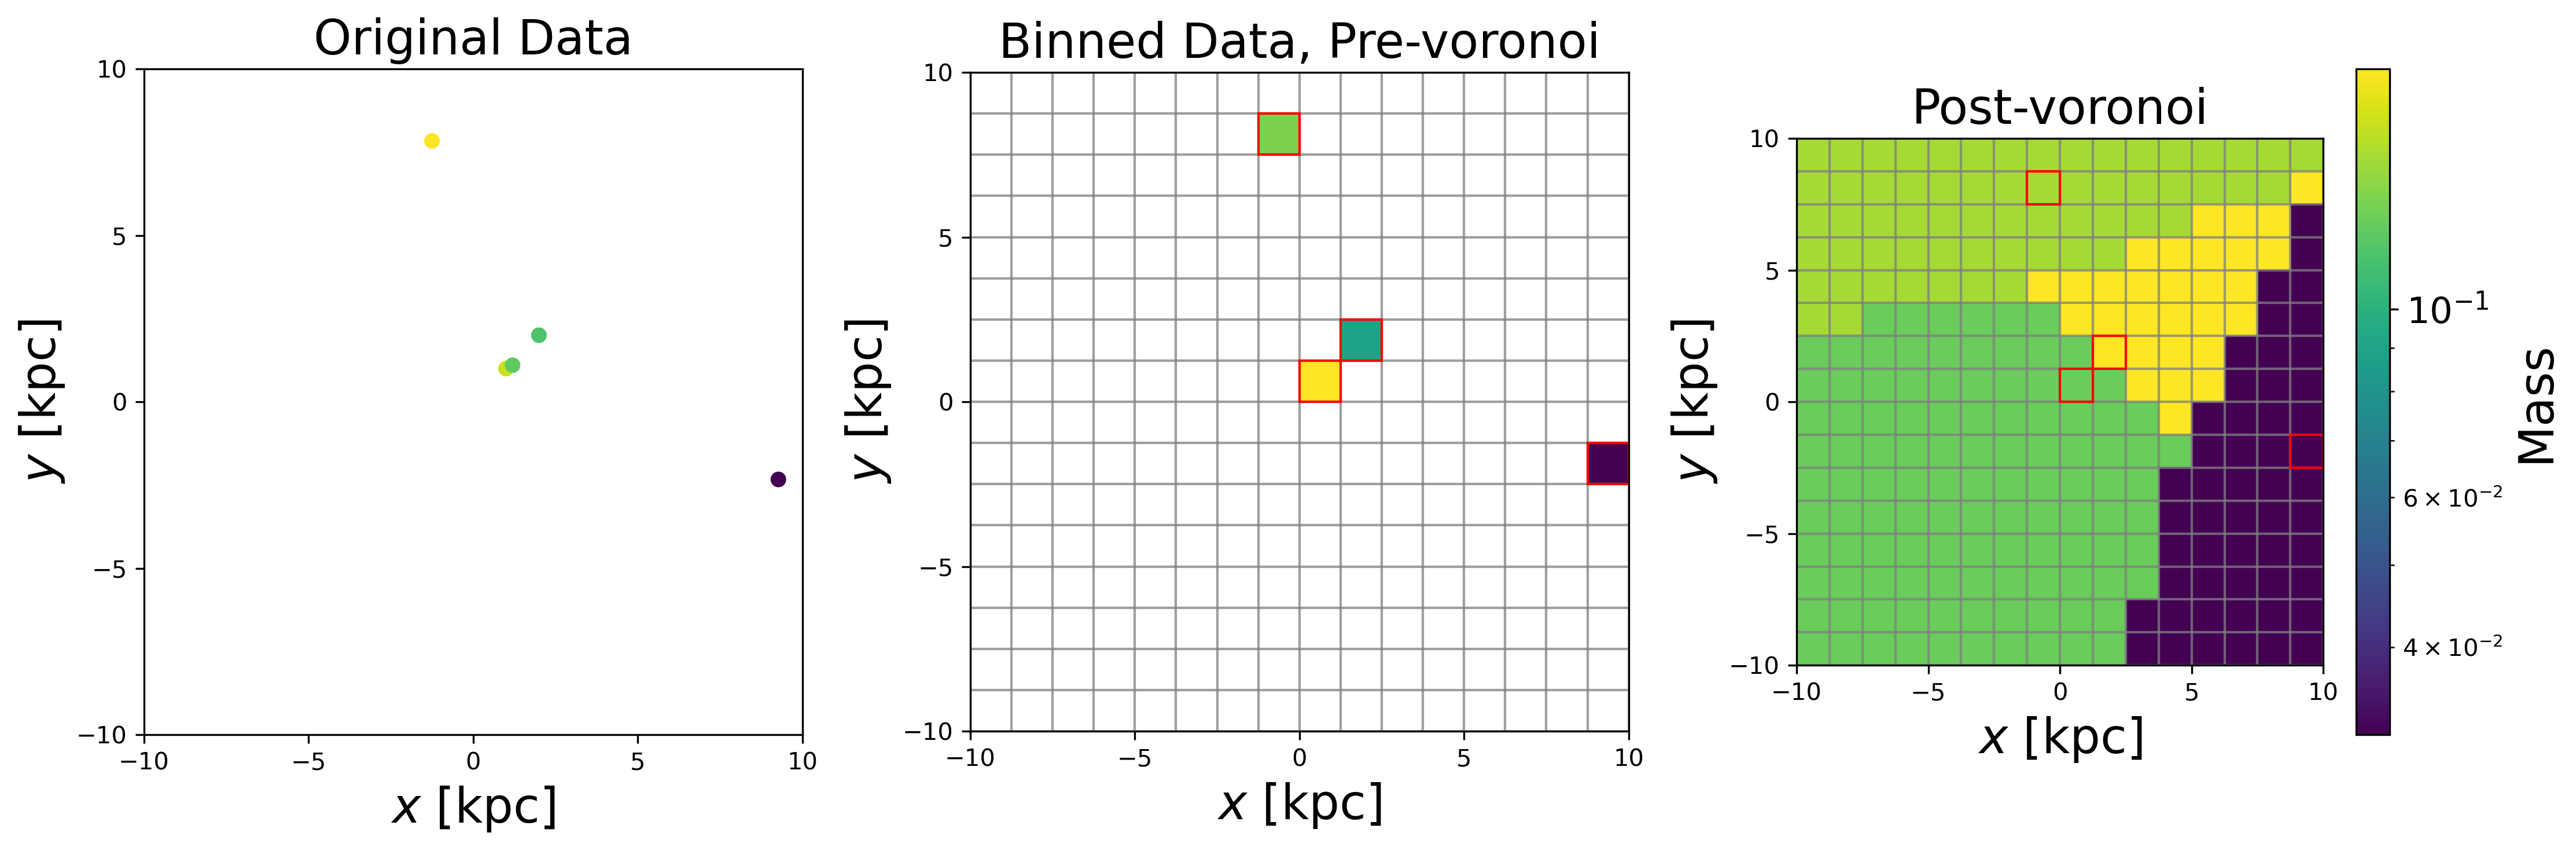

In [11]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300)

# Subplot 1: Original Data
sc = axs[0].scatter(points[:, 0], points[:, 1], c=masses, cmap='viridis', s=30, norm=matplotlib.colors.LogNorm())
# cbar = plt.colorbar(sc, ax=axs[0])
axs[0].set_title("Original Data", size=20)
axs[0].set_xlabel('$x$ [kpc]', size=20)
axs[0].set_ylabel('$y$ [kpc]', size=20)
axs[0].set_xticks(np.array([-10, -5, 0, 5, 10]))
axs[0].set_yticks(np.array([-10, -5, 0, 5, 10]))
# cbar.ax.tick_params(labelsize=15)
# cbar.set_label("Mass", fontsize=20)

# Subplot 2: Binned Data, Pre-voronoi
axs[1].imshow(binned_points.T, extent=[-10, 10, -10, 10], norm=matplotlib.colors.LogNorm(), origin="lower")
for i in range(len(voxel_vertices)):
    axs[1].fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs[1].fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
axs[1].set_title("Binned Data, Pre-voronoi", size=20)
axs[1].set_xlabel('$x$ [kpc]', size=20)
axs[1].set_ylabel('$y$ [kpc]', size=20)
axs[1].set_xticks(np.array([-10, -5, 0, 5, 10]))
axs[1].set_yticks(np.array([-10, -5, 0, 5, 10]))

# Subplot 3: Post-voronoi
im = axs[2].imshow(voronoied_result.T, extent=[-10, 10, -10, 10], norm=matplotlib.colors.LogNorm(), origin="lower")
for i in range(len(voxel_vertices)):
    axs[2].fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs[2].fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
cbar = plt.colorbar(im, ax=axs[2])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Mass", fontsize=20)
axs[2].set_title("Post-voronoi", size=20)
axs[2].set_xlabel('$x$ [kpc]', size=20)
axs[2].set_ylabel('$y$ [kpc]', size=20)
axs[2].set_xticks(np.array([-10, -5, 0, 5, 10]))
axs[2].set_yticks(np.array([-10, -5, 0, 5, 10]))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

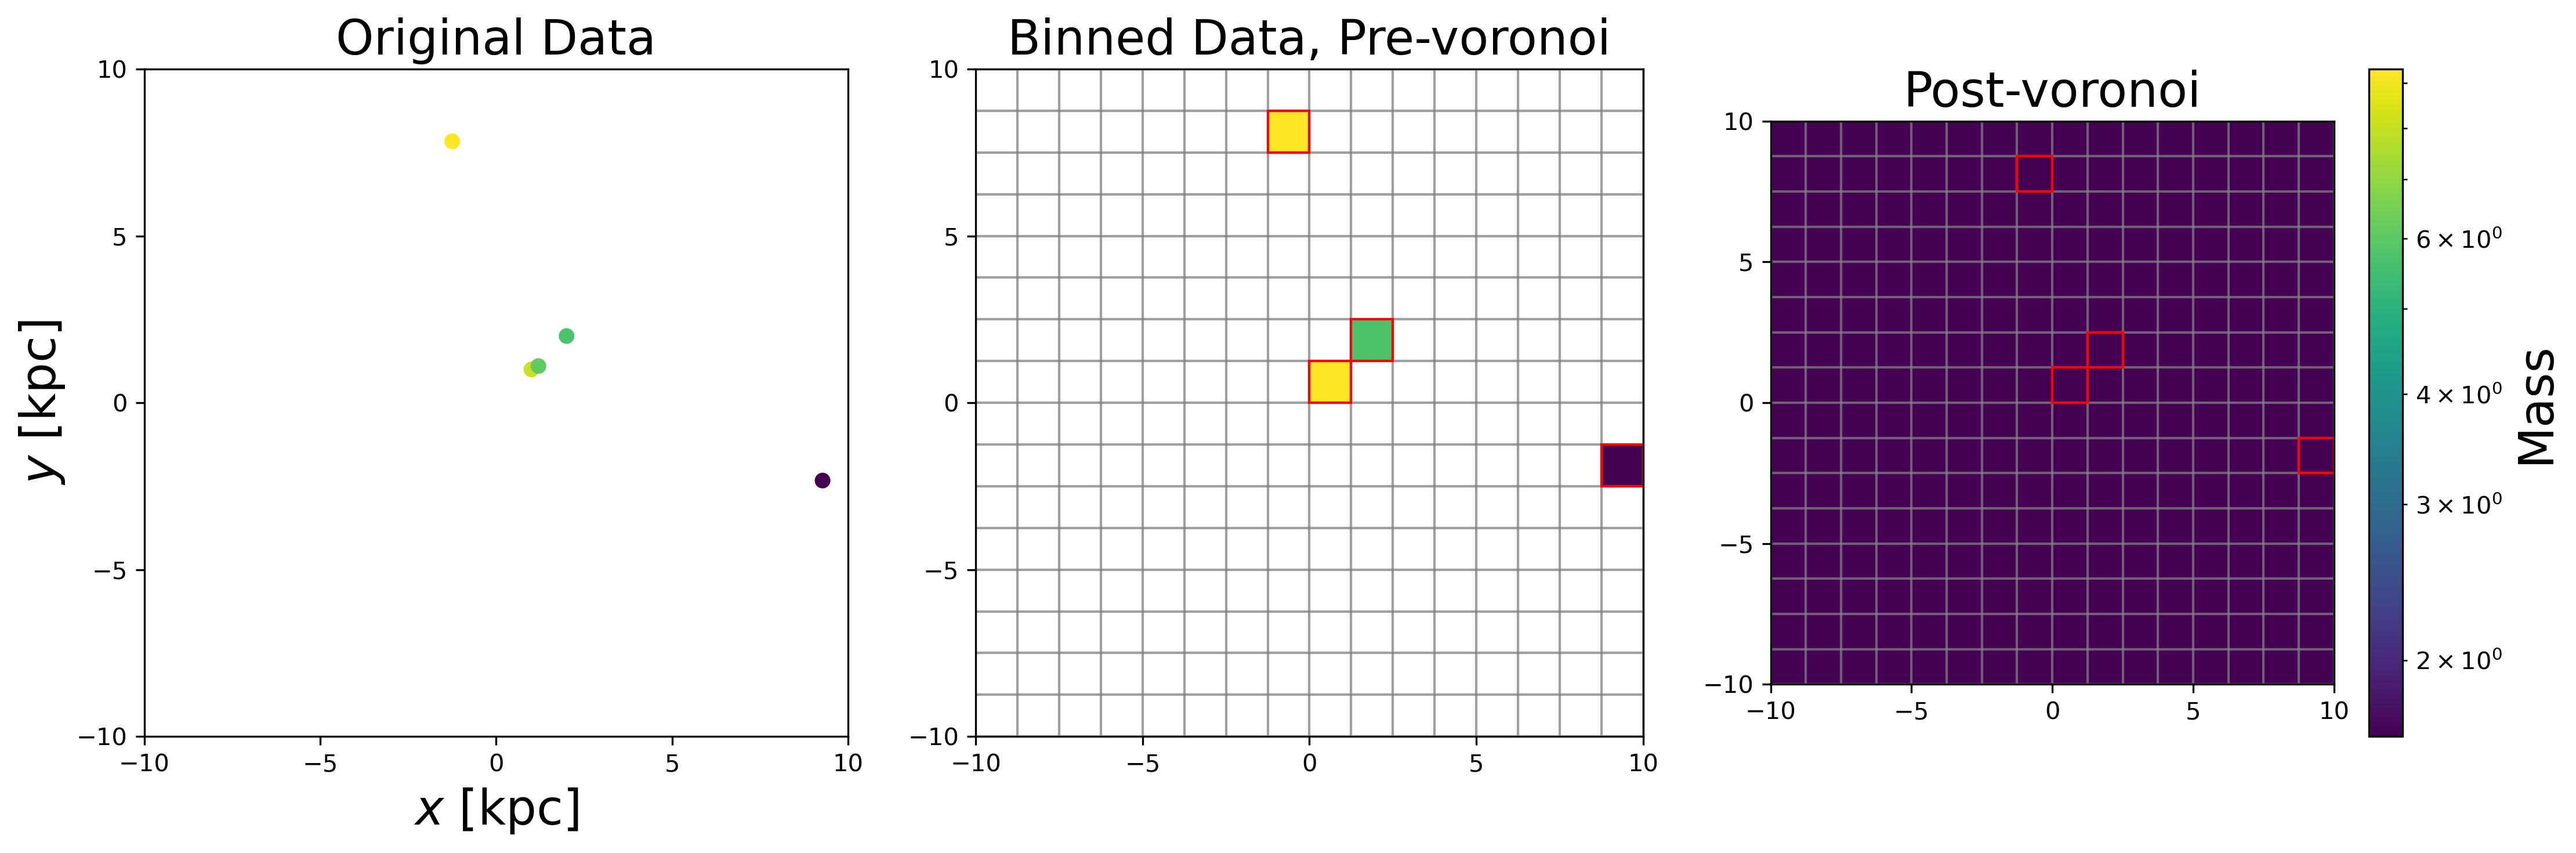

In [19]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300)

# Create a common normalization instance for mass
norm = matplotlib.colors.LogNorm(vmin=masses.min(), vmax=masses.max())

# Subplot 1: Original Data
sc = axs[0].scatter(points[:, 0], points[:, 1], c=masses, cmap='viridis', s=30, norm=norm)
axs[0].set_title("Original Data", size=20)
axs[0].set_xlabel('$x$ [kpc]', size=20)
axs[0].set_ylabel('$y$ [kpc]', size=20)
axs[0].set_xticks(np.array([-10, -5, 0, 5, 10]))
axs[0].set_yticks(np.array([-10, -5, 0, 5, 10]))

# Subplot 2: Binned Data, Pre-voronoi
axs[1].imshow(binned_points.T, extent=[-10, 10, -10, 10], norm=norm, origin="lower")
for i in range(len(voxel_vertices)):
    axs[1].fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs[1].fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
axs[1].set_title("Binned Data, Pre-voronoi", size=20)
# axs[1].set_xlabel('$x$ [kpc]', size=20)
# axs[1].set_ylabel('$y$ [kpc]', size=20)
axs[1].set_xticks(np.array([-10, -5, 0, 5, 10]))
axs[1].set_yticks(np.array([-10, -5, 0, 5, 10]))

# Subplot 3: Post-voronoi
im = axs[2].imshow(voronoied_result.T, extent=[-10, 10, -10, 10], norm=norm, origin="lower")
for i in range(len(voxel_vertices)):
    axs[2].fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs[2].fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
cbar = plt.colorbar(im, ax=axs[2])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Mass", fontsize=20)
axs[2].set_title("Post-voronoi", size=20)
# axs[2].set_xlabel('$x$ [kpc]', size=20)
# axs[2].set_ylabel('$y$ [kpc]', size=20)
axs[2].set_xticks(np.array([-10, -5, 0, 5, 10]))
axs[2].set_yticks(np.array([-10, -5, 0, 5, 10]))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

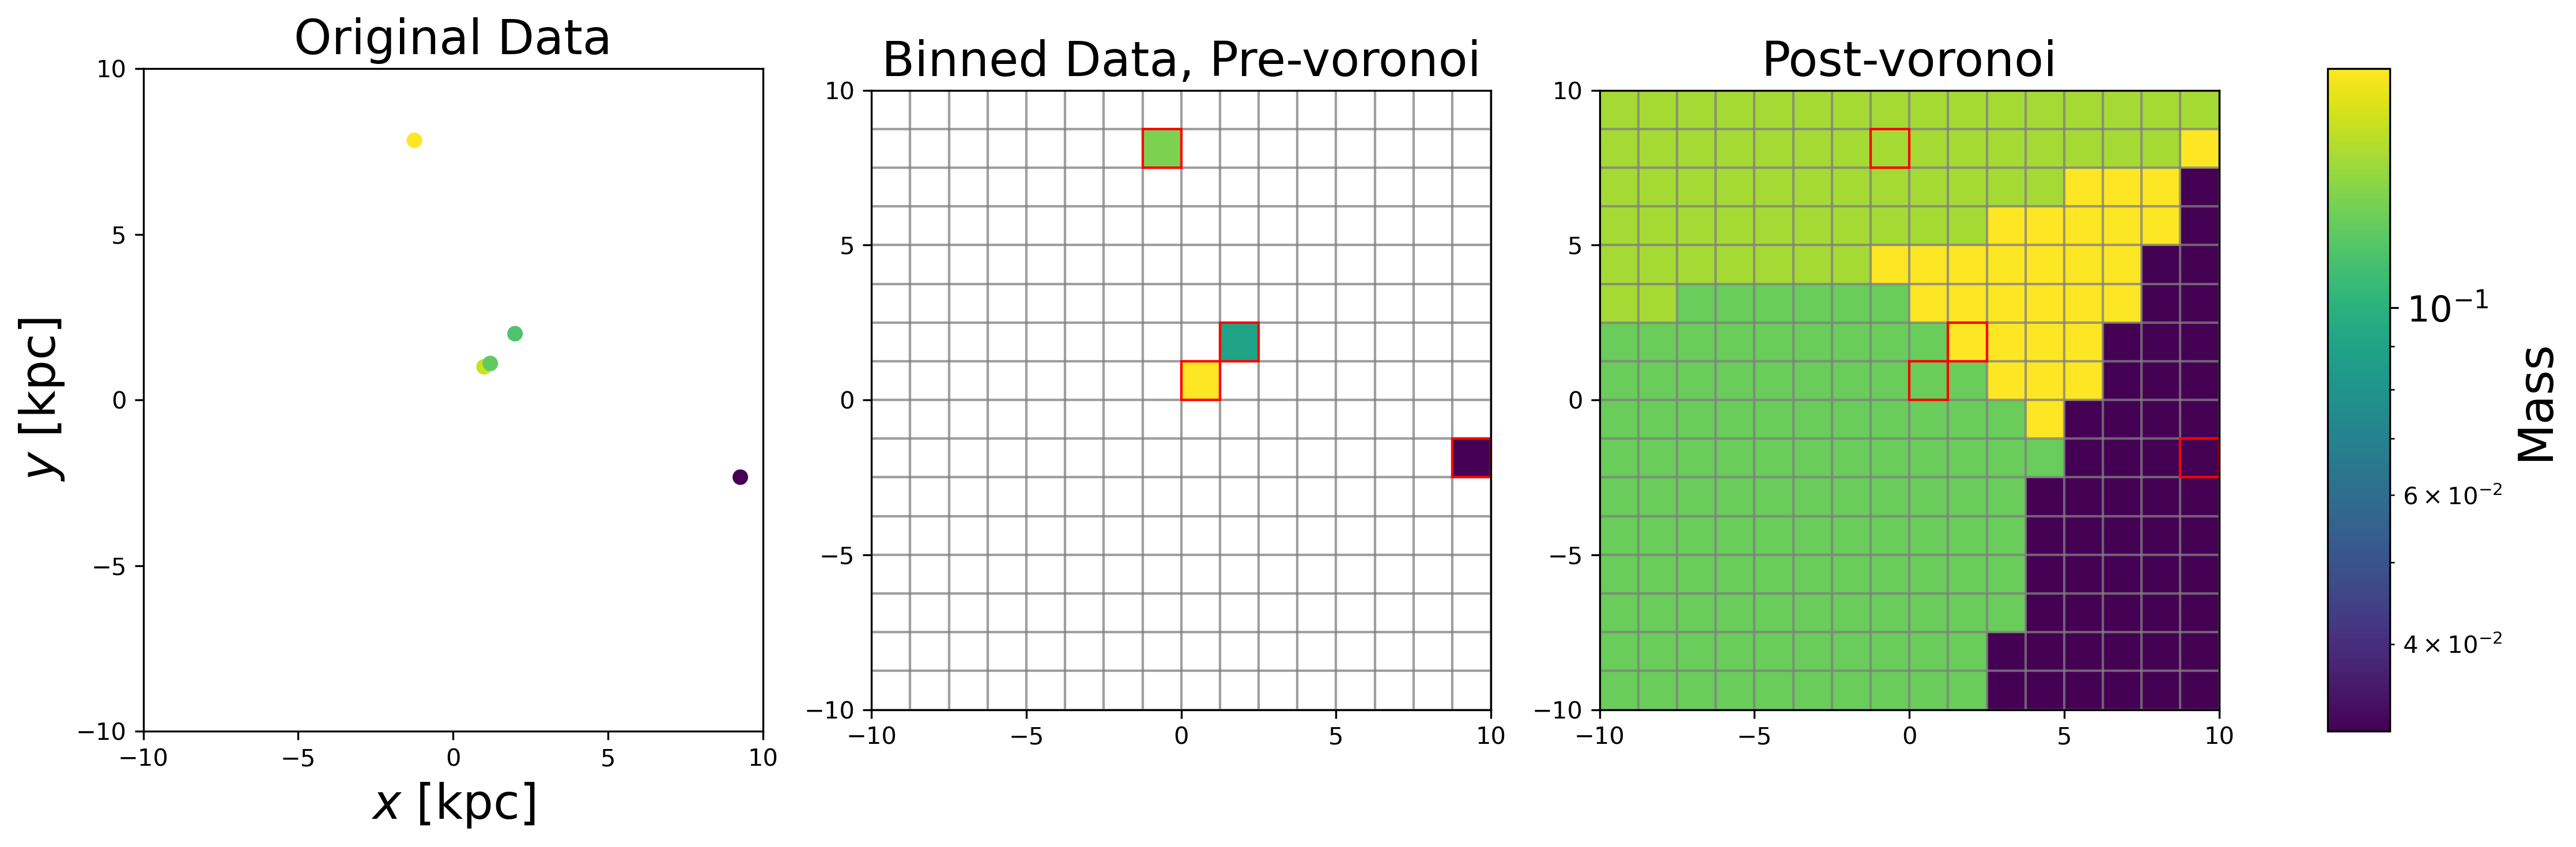

In [12]:
from matplotlib import gridspec
# Create a figure with a custom grid layout
fig = plt.figure(figsize=(15, 5), dpi=300)
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.1], height_ratios = [1])

# Subplot 1: Original Data
axs0 = plt.subplot(gs[0])
sc = axs0.scatter(points[:, 0], points[:, 1], c=masses, cmap='viridis', s=30, norm=matplotlib.colors.LogNorm())
axs0.set_title("Original Data", size=20)
axs0.set_xlabel('$x$ [kpc]', size=20)
axs0.set_ylabel('$y$ [kpc]', size=20)
axs0.set_xticks(np.array([-10, -5, 0, 5, 10]))
axs0.set_yticks(np.array([-10, -5, 0, 5, 10]))

# Subplot 2: Binned Data, Pre-voronoi
axs1 = plt.subplot(gs[1], sharey=axs0)
im1 = axs1.imshow(binned_points.T, extent=[-10, 10, -10, 10], norm=matplotlib.colors.LogNorm(), origin="lower")
for i in range(len(voxel_vertices)):
    axs1.fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs1.fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
axs1.set_title("Binned Data, Pre-voronoi", size=20)
# axs1.set_xlabel('$x$ [kpc]', size=20)
# axs1.set_ylabel('$y$ [kpc]', size=20)
axs1.set_xticks(np.array([-10, -5, 0, 5, 10]))
axs1.set_yticks(np.array([-10, -5, 0, 5, 10]))

# Subplot 3: Post-voronoi
axs2 = plt.subplot(gs[2], sharey=axs0)
im2 = axs2.imshow(voronoied_result.T, extent=[-10, 10, -10, 10], norm=matplotlib.colors.LogNorm(), origin="lower")
for i in range(len(voxel_vertices)):
    axs2.fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs2.fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
axs2.set_title("Post-voronoi", size=20)
# axs2.set_xlabel('$x$ [kpc]', size=20)
# axs2.set_ylabel('$y$ [kpc]', size=20)
axs2.set_xticks(np.array([-10, -5, 0, 5, 10]))
axs2.set_yticks(np.array([-10, -5, 0, 5, 10]))

# Colorbar for the third subplot
cbar_ax = plt.subplot(gs[3])
cbar = plt.colorbar(im2, cax=cbar_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Mass", fontsize=20)

# Adjust layout
plt.tight_layout()

plt.savefig("../visuals/tesseltation-demo-all"+".png", bbox_inches='tight')
plt.savefig("../visuals/tesseltation-demo-all"+".pdf", bbox_inches='tight')

plt.show()

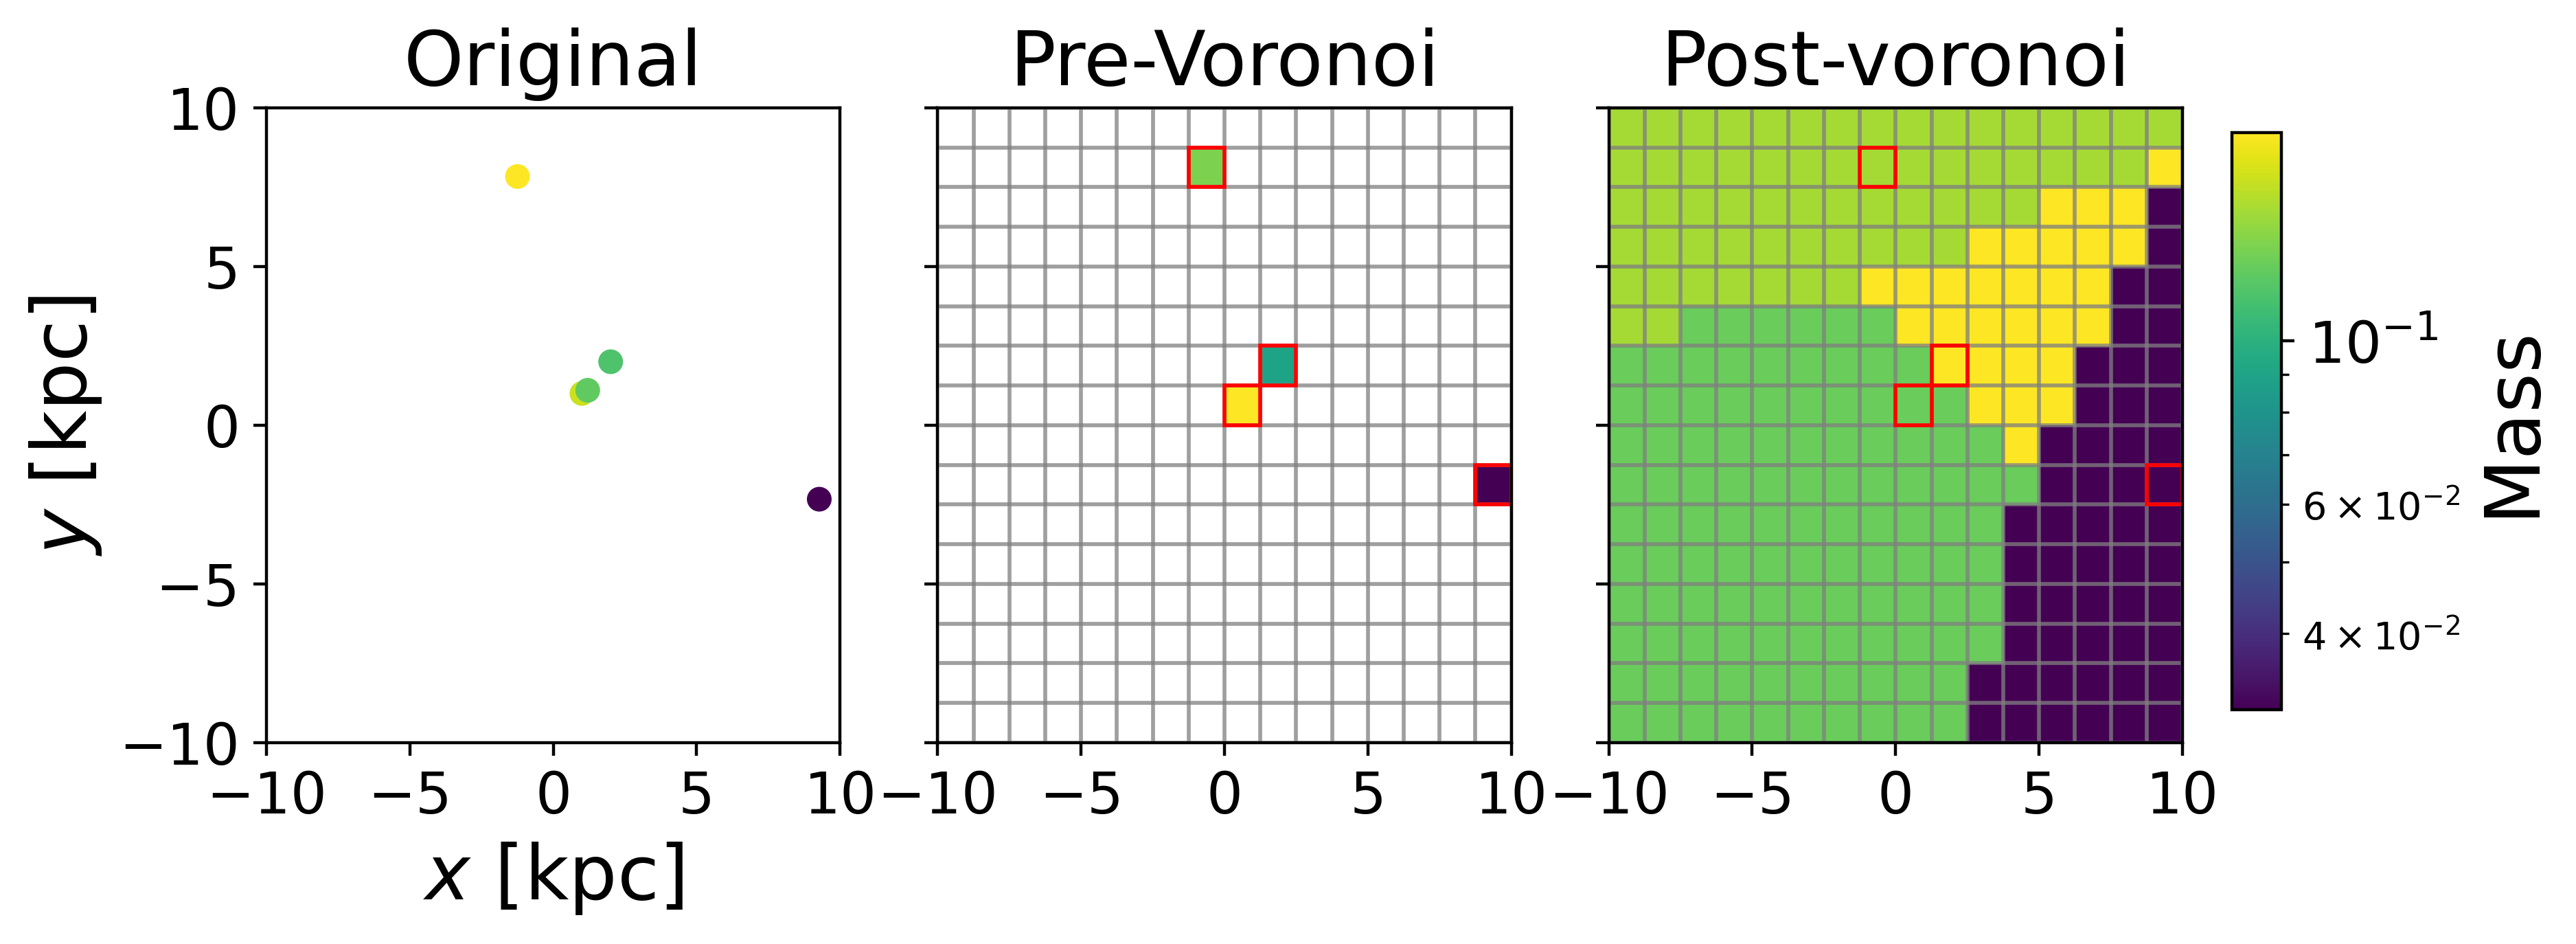

In [30]:
plt.close()
fig, ax = plt.subplots(1,3, dpi=400, figsize=(9,3), sharey=True)

# Subplot 1: Original Data
axs0 = ax[0]
sc = axs0.scatter(points[:, 0], points[:, 1], c=masses, 
                  cmap='viridis', s=30, norm=matplotlib.colors.LogNorm())
axs0.set_title("Original", size=20)
axs0.set_xlabel('$x$ [kpc]', size=20)
axs0.set_ylabel('$y$ [kpc]', size=20)
axs0.set_xticks(np.array([-10, -5, 0, 5, 10]))
axs0.set_yticks(np.array([-10, -5, 0, 5, 10]))


# Subplot 2: Binned Data, Pre-voronoi
axs1 = ax[1]
im1 = axs1.imshow(binned_points.T, extent=[-10, 10, -10, 10], 
                  norm=matplotlib.colors.LogNorm(), origin="lower", aspect='auto')
for i in range(len(voxel_vertices)):
    axs1.fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs1.fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
axs1.set_title("Pre-Voronoi", size=20)
# axs1.set_xlabel('$x$ [kpc]', size=20)
# axs1.set_ylabel('$y$ [kpc]', size=20)
axs1.set_xticks(np.array([-10, -5, 0, 5, 10]))
axs1.set_yticks(np.array([-10, -5, 0, 5, 10]))

# Subplot 3: Post-voronoi
axs2 = ax[2]
im2 = axs2.imshow(voronoied_result.T, extent=[-10, 10, -10, 10], 
                  norm=matplotlib.colors.LogNorm(), origin="lower", aspect='auto')
for i in range(len(voxel_vertices)):
    axs2.fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs2.fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
axs2.set_title("Post-voronoi", size=20)
axs2.set_xticks(np.array([-10, -5, 0, 5, 10]))
axs2.set_yticks(np.array([-10, -5, 0, 5, 10]))

# # Colorbar for the third subplot
# # cbar_ax = axs2
# cbar = plt.colorbar(im2)
# cbar.ax.tick_params(labelsize=15)
# cbar.set_label("Mass", fontsize=15)


# Create an axis for the colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im2, cax=cbar_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Mass", fontsize=20)


plt.subplots_adjust(wspace=0.17, hspace=0)


for axsX in ax:
    axsX.tick_params(axis='both', which='major', labelsize=15)

plt.savefig("../visuals/voronoi-demo.pdf", bbox_inches="tight")
# plt.show()


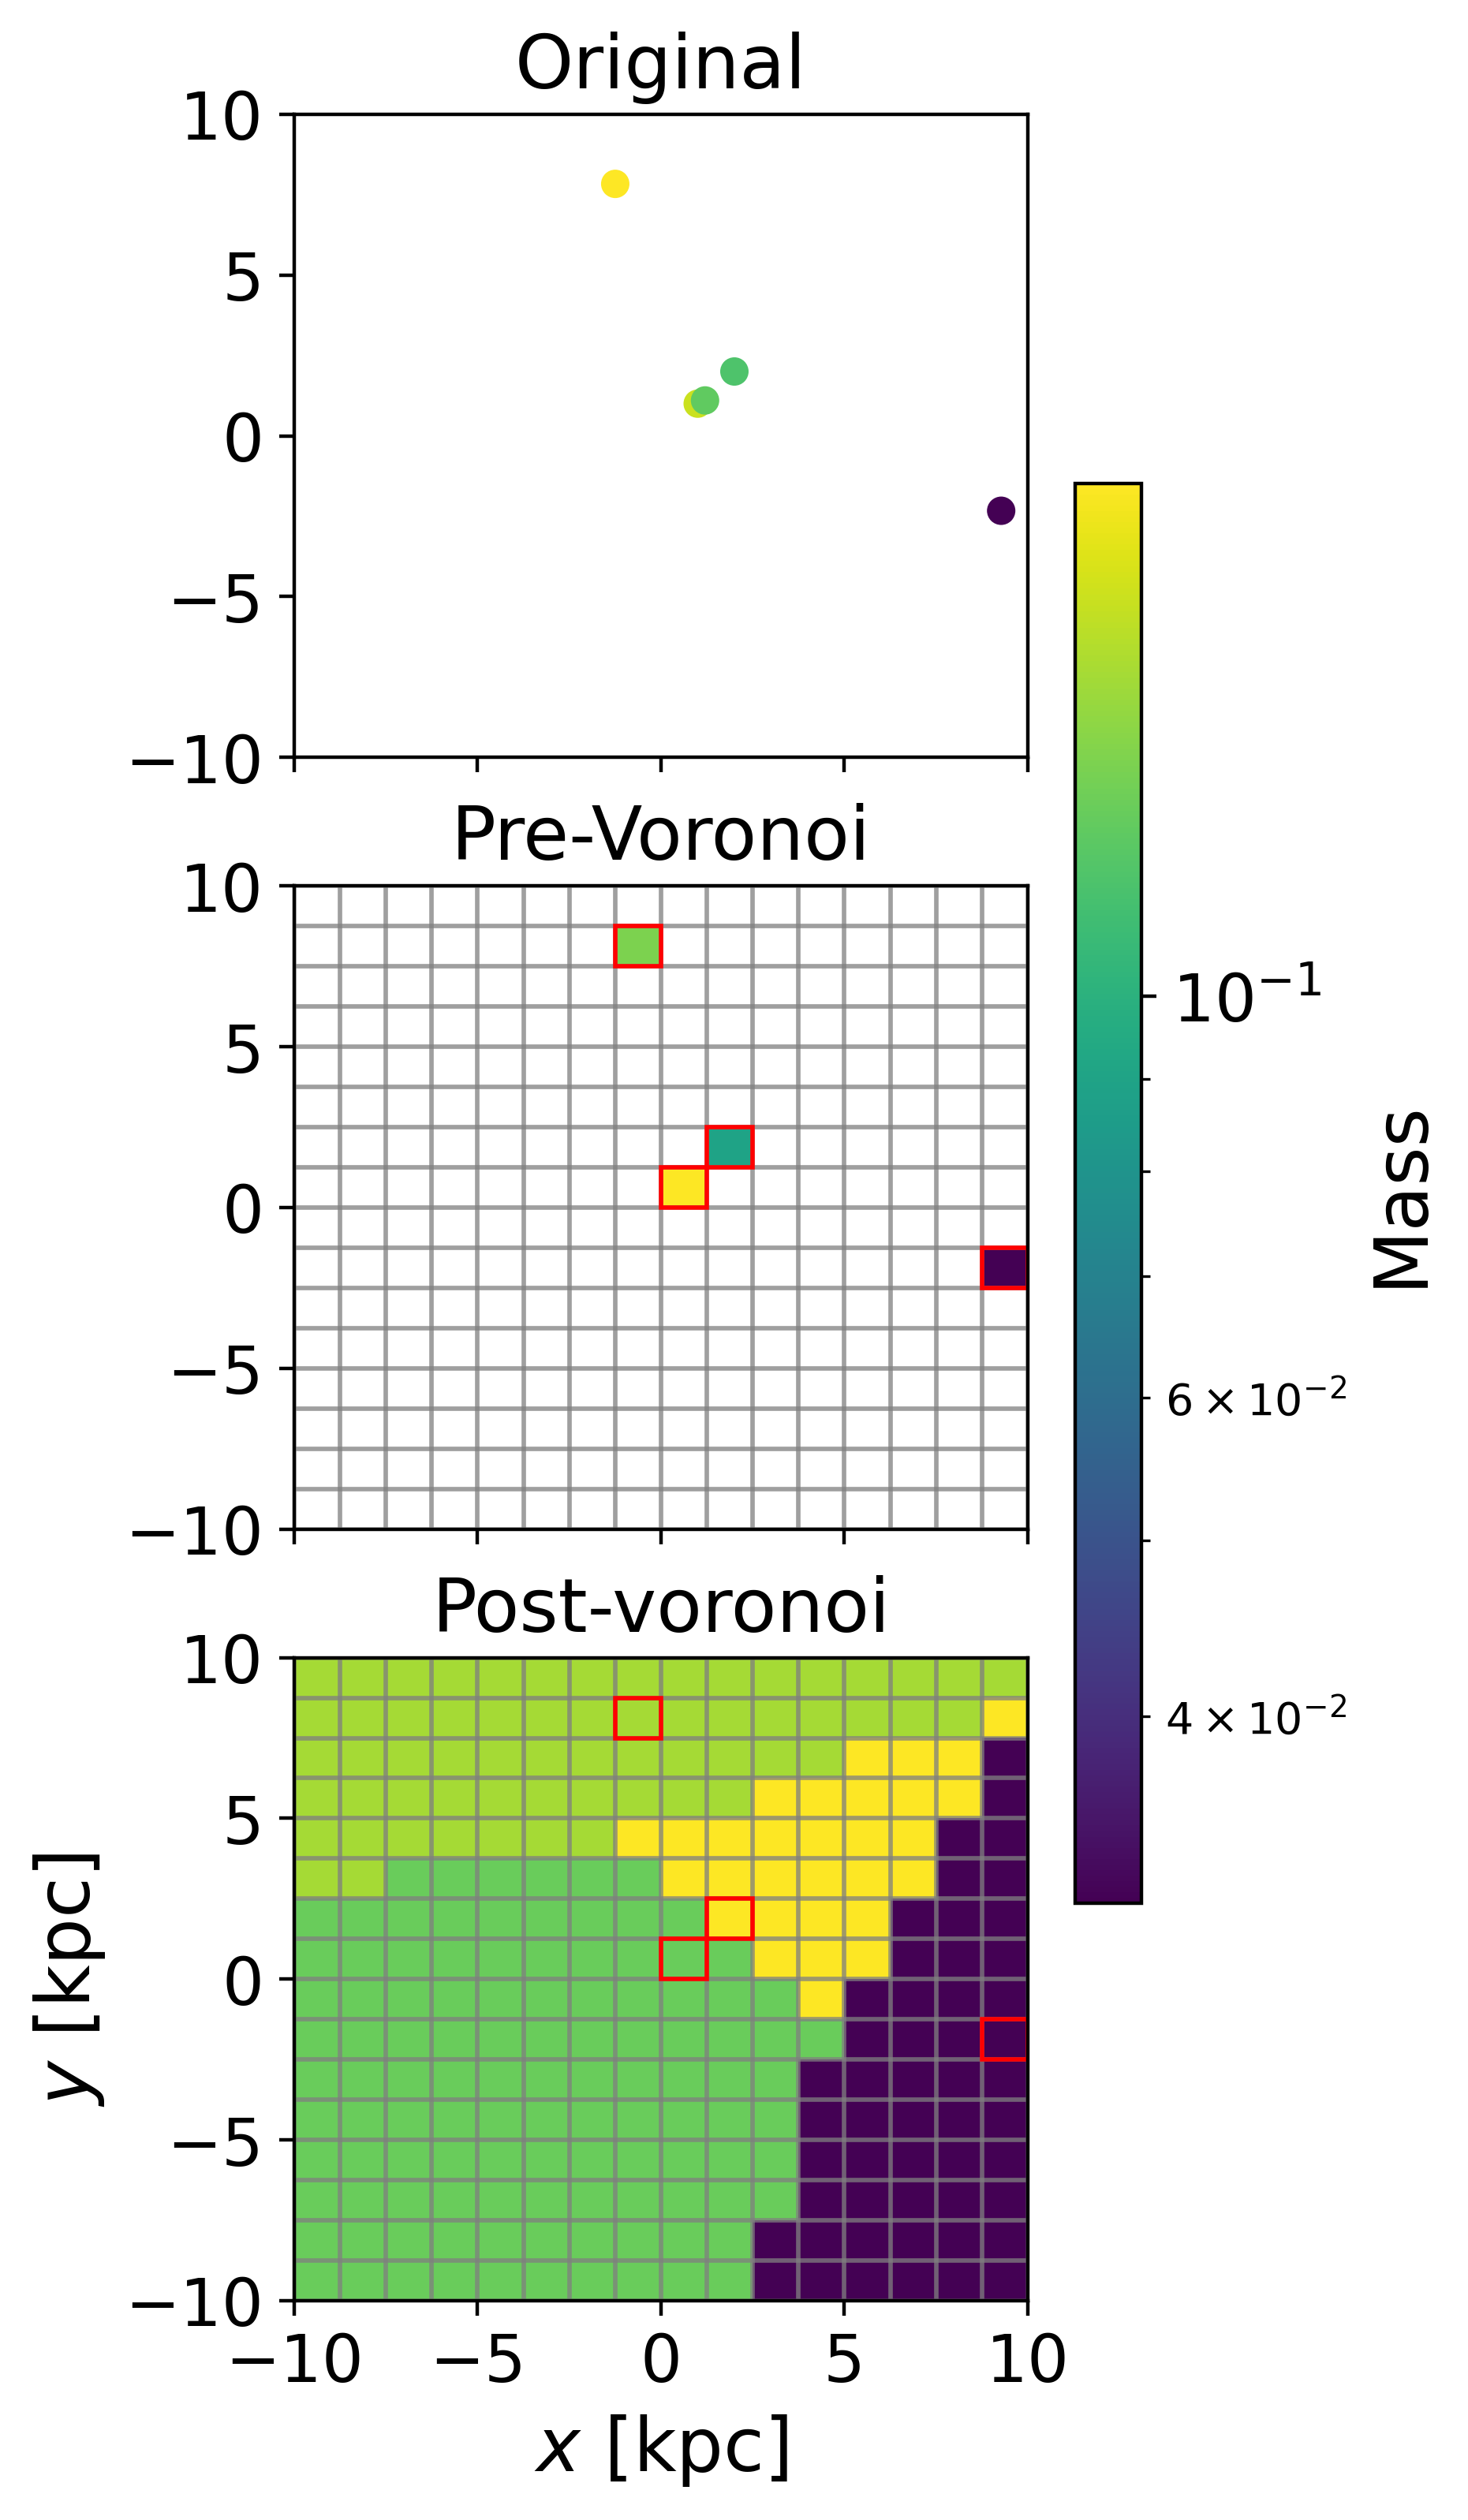

In [39]:
plt.close()
fig, ax = plt.subplots(3,1, dpi=400, figsize=(3,9), sharex=True)

# Subplot 1: Original Data
axs0 = ax[0]
sc = axs0.scatter(points[:, 0], points[:, 1], c=masses, 
                  cmap='viridis', s=30, norm=matplotlib.colors.LogNorm())
axs0.set_title("Original", size=17)
# axs0.set_xlabel('$x$ [kpc]', size=20)
# axs0.set_ylabel('$y$ [kpc]', size=20)
axs0.set_xticks(np.array([-10, -5, 0, 5, 10]))
axs0.set_yticks(np.array([-10, -5, 0, 5, 10]))


# Subplot 2: Binned Data, Pre-voronoi
axs1 = ax[1]
im1 = axs1.imshow(binned_points.T, extent=[-10, 10, -10, 10], 
                  norm=matplotlib.colors.LogNorm(), origin="lower", aspect='auto')
for i in range(len(voxel_vertices)):
    axs1.fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs1.fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
axs1.set_title("Pre-Voronoi", size=17)
# axs1.set_xlabel('$x$ [kpc]', size=20)
# axs1.set_ylabel('$y$ [kpc]', size=20)
axs1.set_xticks(np.array([-10, -5, 0, 5, 10]))
axs1.set_yticks(np.array([-10, -5, 0, 5, 10]))

# Subplot 3: Post-voronoi
axs2 = ax[2]
im2 = axs2.imshow(voronoied_result.T, extent=[-10, 10, -10, 10], 
                  norm=matplotlib.colors.LogNorm(), origin="lower", aspect='auto')
for i in range(len(voxel_vertices)):
    axs2.fill(voxel_vertices[i][:, 0], voxel_vertices[i][:, 1], edgecolor='black', fill=False, alpha=0.5, c="gray")

for i in range(len(voxel_vertices[select_binned_points])):
    axs2.fill(voxel_vertices[select_binned_points][i][:, 1], voxel_vertices[select_binned_points][i][:, 0],
                edgecolor='black', fill=False, alpha=1, c="red")
axs2.set_title("Post-voronoi", size=17)
axs2.set_xticks(np.array([-10, -5, 0, 5, 10]))
axs2.set_yticks(np.array([-10, -5, 0, 5, 10]))

axs2.set_xlabel('$x$ [kpc]', size=17)
axs2.set_ylabel('$y$ [kpc]', size=17)

# # Colorbar for the third subplot
# # cbar_ax = axs2
# cbar = plt.colorbar(im2)
# cbar.ax.tick_params(labelsize=15)
# cbar.set_label("Mass", fontsize=15)


# Create an axis for the colorbar
cbar_ax = fig.add_axes([0.95, 0.25, 0.07, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im2, cax=cbar_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Mass", fontsize=17)


# plt.subplots_adjust(wspace=0.17, hspace=0)


for axsX in ax:
    axsX.tick_params(axis='both', which='major', labelsize=15)

plt.savefig("../visuals/voronoi-demo.pdf", bbox_inches="tight")
# plt.show()
